In [1]:
import numpy as np
import pandas as pd
from scipy import stats

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.colors import LinearSegmentedColormap


import seaborn as sns
%matplotlib inline
sns.set_style('white')
sns.set_context('paper')
# Plot adjustments:
plt.rcParams.update({'ytick.labelsize': 15})
plt.rcParams.update({'xtick.labelsize': 15})
plt.rcParams.update({'axes.labelsize': 20})
plt.rcParams.update({'legend.fontsize': 12})
plt.rcParams.update({'axes.titlesize': 16})

from gpmodel import gpkernel

In [2]:
cmap = cm.terrain
colors = [cmap(i) for i in range(220)]
cmap = LinearSegmentedColormap.from_list('name', colors)

In [3]:
n = 100

r = 1
x = np.linspace(-1.4, 1.4, n)
y = np.linspace(-1.4, 1.4, n)
X, Y = np.meshgrid(x, y)


XY = np.empty((n * n, 2))
XY[:, 0] = X.flatten()
XY[:, 1] = Y.flatten()

In [4]:
cov = np.eye(2) * 0.2
dist = stats.multivariate_normal(np.zeros(2), cov)
Z = dist.pdf(XY).reshape((n, n))
Z += np.random.random((n, n)) * 0.0

inside = np.sqrt(X ** 2 + Y ** 2) < r
Xm = np.ma.masked_where(inside, X)
Ym = np.ma.masked_where(inside, Y)
Zm = np.ma.masked_where(inside, Z)

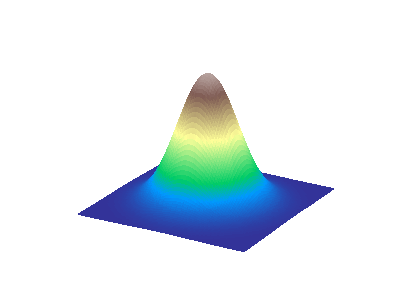

In [5]:
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

_ = ax.plot_surface(Xm, Ym, Zm, cmap=cmap, 
                    rstride=1, cstride=1, edgecolor=None, antialiased=False, shade=False)
# ax._axis3don = False
# Hide grid lines
ax.grid(False)

# Hide axes ticks
ax.set_xticks([])
ax.set_yticks([])
ax.set_zticks([])
plt.axis('off')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
_ = fig.savefig('single_peak_terrain.png')

In [6]:
n = 100

r = 1
x = np.linspace(-1.4, 1.4, n)
y = np.linspace(-1.4, 1.4, n)
X, Y = np.meshgrid(x, y)


XY = np.empty((n * n, 2))
XY[:, 0] = X.flatten()
XY[:, 1] = Y.flatten()

cov = np.eye(2) * 0.2
dist = stats.multivariate_normal(np.zeros(2), cov)
Z = dist.pdf(XY).reshape((n, n))

cov = np.array([[0.01, 0.002],
               [0.005, 0.01]])
dist = stats.multivariate_normal(np.array([-0.5, -0.2]), cov)
Z += dist.pdf(XY).reshape((n, n)) * 0.01

cov = np.array([[0.01, 0.002],
               [0.003, 0.01]])
dist = stats.multivariate_normal(np.array([0.7, 0.2]), cov)
Z += dist.pdf(XY).reshape((n, n)) * 0.015

cov = np.array([[0.01, 0.002],
               [0.003, 0.01]])
dist = stats.multivariate_normal(np.array([0.35, 0.1]), cov)
Z += dist.pdf(XY).reshape((n, n)) * 0.005

cov = np.array([[0.01, 0.002],
               [0.003, 0.02]])
dist = stats.multivariate_normal(np.array([0.9, -0.8]), cov)
Z += dist.pdf(XY).reshape((n, n)) * 0.02

cov = np.array([[0.02, 0.002],
               [0.003, 0.01]])
dist = stats.multivariate_normal(np.array([0.6, -0.3]), cov)
Z += dist.pdf(XY).reshape((n, n)) * 0.03

cov = np.array([[0.01, 0.002],
               [0.003, 0.01]])
dist = stats.multivariate_normal(np.array([0., -0.8]), cov)
Z += dist.pdf(XY).reshape((n, n)) * 0.035

inside = np.sqrt(X ** 2 + Y ** 2) < r
Xm = np.ma.masked_where(inside, X)
Ym = np.ma.masked_where(inside, Y)
Zm = np.ma.masked_where(inside, Z)

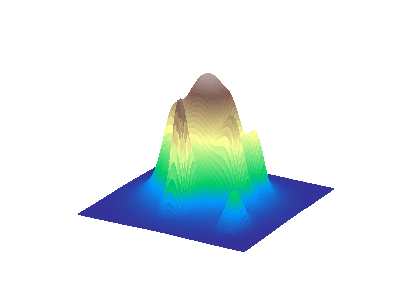

In [7]:
pal = sns.color_palette()
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

_ = ax.plot_surface(Xm, Ym, Zm, cmap=cmap, 
                    rstride=1, cstride=1, antialiased=False, shade=True)
# _ = ax.plot_wireframe(Xm, Ym, Zm, color='grey')
ax._axis3don = False
# Hide grid lines
ax.grid(False)

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
# plt.axis('off')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
_ = fig.savefig('multiple_terrain.png')

In [8]:
n = 100

r = 10
x = np.linspace(-1.8, 1.8, n)
y = np.linspace(-1.8, 1.8, n)
X, Y = np.meshgrid(x, y)


XY = np.empty((n * n, 2))
XY[:, 0] = X.flatten()
XY[:, 1] = Y.flatten()

cov = np.eye(2) * 0.2
dist = stats.multivariate_normal(np.array([-0.6, -0.6]), cov)
Z = dist.pdf(XY).reshape((n, n))

cov = np.eye(2) * 0.2
dist = stats.multivariate_normal(np.array([0.6, 0.6]), cov)
Z += dist.pdf(XY).reshape((n, n))

cov = np.array([[0.1, 0.002],
               [0.005, 0.1]])
dist = stats.multivariate_normal(np.array([0.5, -0.5]), cov)
Z += dist.pdf(XY).reshape((n, n)) * 1

cov = np.array([[0.05, 0.002],
               [0.003, 0.05]])
dist = stats.multivariate_normal(np.array([-0.5, -1.0]), cov)
Z += dist.pdf(XY).reshape((n, n)) * 0.15

# cov = np.array([[0.01, 0.002],
#                [0.003, 0.01]])
# dist = stats.multivariate_normal(np.array([0.35, 0.1]), cov)
# Z += dist.pdf(XY).reshape((n, n)) * 0.005

# cov = np.array([[0.01, 0.002],
#                [0.003, 0.02]])
# dist = stats.multivariate_normal(np.array([0.9, -0.8]), cov)
# Z += dist.pdf(XY).reshape((n, n)) * 0.01

# cov = np.array([[0.02, 0.002],
#                [0.003, 0.01]])
# dist = stats.multivariate_normal(np.array([0.6, -0.3]), cov)
# Z += dist.pdf(XY).reshape((n, n)) * 0.01

# cov = np.array([[0.01, 0.002],
#                [0.003, 0.01]])
# dist = stats.multivariate_normal(np.array([0., -0.8]), cov)
# Z += dist.pdf(XY).reshape((n, n)) * 0.035
inside = np.sqrt(X ** 2 + Y ** 2) < r
Xm = np.ma.masked_where(inside, X)
Ym = np.ma.masked_where(inside, Y)
Zm = np.ma.masked_where(inside, Z)

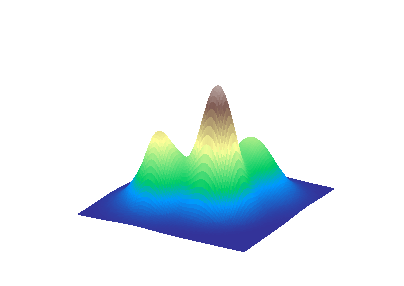

In [9]:
pal = sns.color_palette()
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

_ = ax.plot_surface(Xm, Ym, Zm, cmap=cmap, 
                    rstride=1, cstride=1, antialiased=False, shade=True)
# _ = ax.plot_wireframe(Xm, Ym, Zm, color='grey')
ax._axis3don = False
# Hide grid lines
ax.grid(False)

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
# plt.axis('off')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
_ = fig.savefig('triple_terrain.png')

In [20]:
n = 1000

r = 10
x = np.linspace(-1.7, 1.7, n)
y = np.linspace(-1.7, 1.7, n)
X, Y = np.meshgrid(x, y)


XY = np.empty((n * n, 2))
XY[:, 0] = X.flatten()
XY[:, 1] = Y.flatten()

Z = np.zeros((n, n))
np.random.seed(1226)
for _ in range(50):
    emb = np.random.random((2, 5)) * 0.05
    cov = emb @ emb.T
    x = np.random.random() * 2 - 1
    y = np.random.random() * 2 - 1
    mag = np.random.random()
    dist = stats.multivariate_normal(np.array([x, y]), cov)
    Z += dist.pdf(XY).reshape((n, n))

inside = np.sqrt(X ** 2 + Y ** 2) < r
Xm = np.ma.masked_where(inside, X)
Ym = np.ma.masked_where(inside, Y)
Zm = np.ma.masked_where(inside, Z)

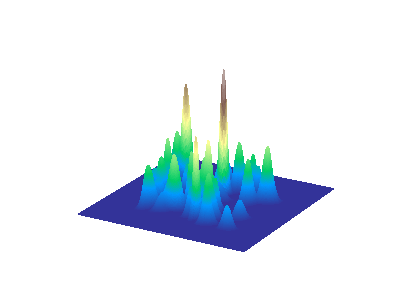

In [21]:
pal = sns.color_palette()
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')

_ = ax.plot_surface(Xm, Ym, Zm, cmap=cmap, 
                    rstride=1, cstride=1, antialiased=False, shade=True)
# _ = ax.plot_wireframe(Xm, Ym, Zm, color='grey')
ax._axis3don = False
# Hide grid lines
ax.grid(False)

# Hide axes ticks
# ax.set_xticks([])
# ax.set_yticks([])
# ax.set_zticks([])
# plt.axis('off')
ax.xaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.yaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
ax.zaxis.set_pane_color((1.0, 1.0, 1.0, 0.0))
# _ = fig.savefig('rugged_terrain.png')